In [1]:
import sys, os
from plotter import ExperimentPlotter
sys.path.append('../../../../../../')
%matplotlib notebook

**Figures that are generated :**
- speed plots
- rewards
- xy position
- crosstrack error
- acceleration and steering inputs

Table generated with this LaTeX format: [Table format](https://nhigham.com/2019/11/19/better-latex-tables-with-booktabs/)

This is the whole pipeline, which consists of 3 steps:
- Run the experiments in `cavs_environments/vehicle/k_road/scenario/path_following/experiment/path_following_recorder.py`
- Configure the file that we would like to plot or record on tables
- Use `cavs_environments/vehicle/k_road/scenario/path_following/experiment/plotter.py`

**Running consecutive RL experiments in `path_following_recorder.py`**

To run RL experiments on multiple paths (figure eight, double lane change...), we start from a folder called `aug13_2020_controllers`, for example, this folder will have all the controller files for an RL agent. Make sure the controller files contain a checkpoint folder, a `_layout.json`, a `_log.jsonl`, and a `_config.json`.

We then uncomment the lines in `path_following_recorder.py` of the code that says:

```
rl_config_dictionary = parse_json_rl_controllers(file_path = "aug13_2020_controllers")
run_rl_experiments(rl_config_dictionary, path_generators = ['figure_eight_generator'],
                               render = False, common_default_config = common_default_config)
run_classical_experiments(common_default_config = common_default_config)
```

These will generate the necessary experiment files under, probably, `log/` in that same folder. If at any point there is an error or the experiment could not be completed, these functions will move on to the next experiment. This might cause experiments where some files are missing, those files will be ignored by the plotter.

In [14]:
"""
    This is how you load all data
    inside a folder
    
    In order for this to work properly, you need three files from each experiment:
     - *_layout.json
     - *_log.jsonl
     - *_config.json   
     
     If any of these files are missing, then the plotter will ignore the experiment!
"""
log_path = '/home/ctripp/project/cavs/src/cavs-environments/cavs_environments/vehicle/k_road/scenario/path_following/experiment/pub_logs/basic/'
output_path = '/home/ctripp/project/cavs/src/cavs-environments/cavs_environments/vehicle/k_road/scenario/path_following/experiment/pub_logs/basic/fig'
plotter = ExperimentPlotter(path_name=log_path, verbose=False)

In [15]:
"""
    This will generate all the path figures. It will sort the experiments by path and 
        call `generate_speed_plots()`, `generate_rewards_plots()`, `generate_xy_plots()`, 
        `generate_crosstrack_error()`, `generate_inputs_plots()`
"""

plotter.generate_all_path_figures(target_path=output_path)

KeyError: 'right_turn_flat_generator'

In [9]:
"""
    This will generate a LaTeX configured table with the specified name, in this case `tabular.tex` that
    you can just drag and drop into the LaTeX file. The table entries are:
    
    average change in steering
    average change in acceleration
    average error in speed
    maximum error in speed
    minimum error in speed 
    mean crosstrack error
    max crosstrack error
    min crosstrack error
    maximum heading difference
    minimum heading difference
    
    when we provide a list of path generators the table will only have the subcolumns
    classified by the specified paths
"""
plotter.generate_tabular_entries('tabular',
                                 ['figure_eight_generator'],
                                 plotter.test_dictionary, [],
                                 plotter.labels_map)

Values from plot recorder: 


IndexError: list index out of range

<IPython.core.display.Javascript object>


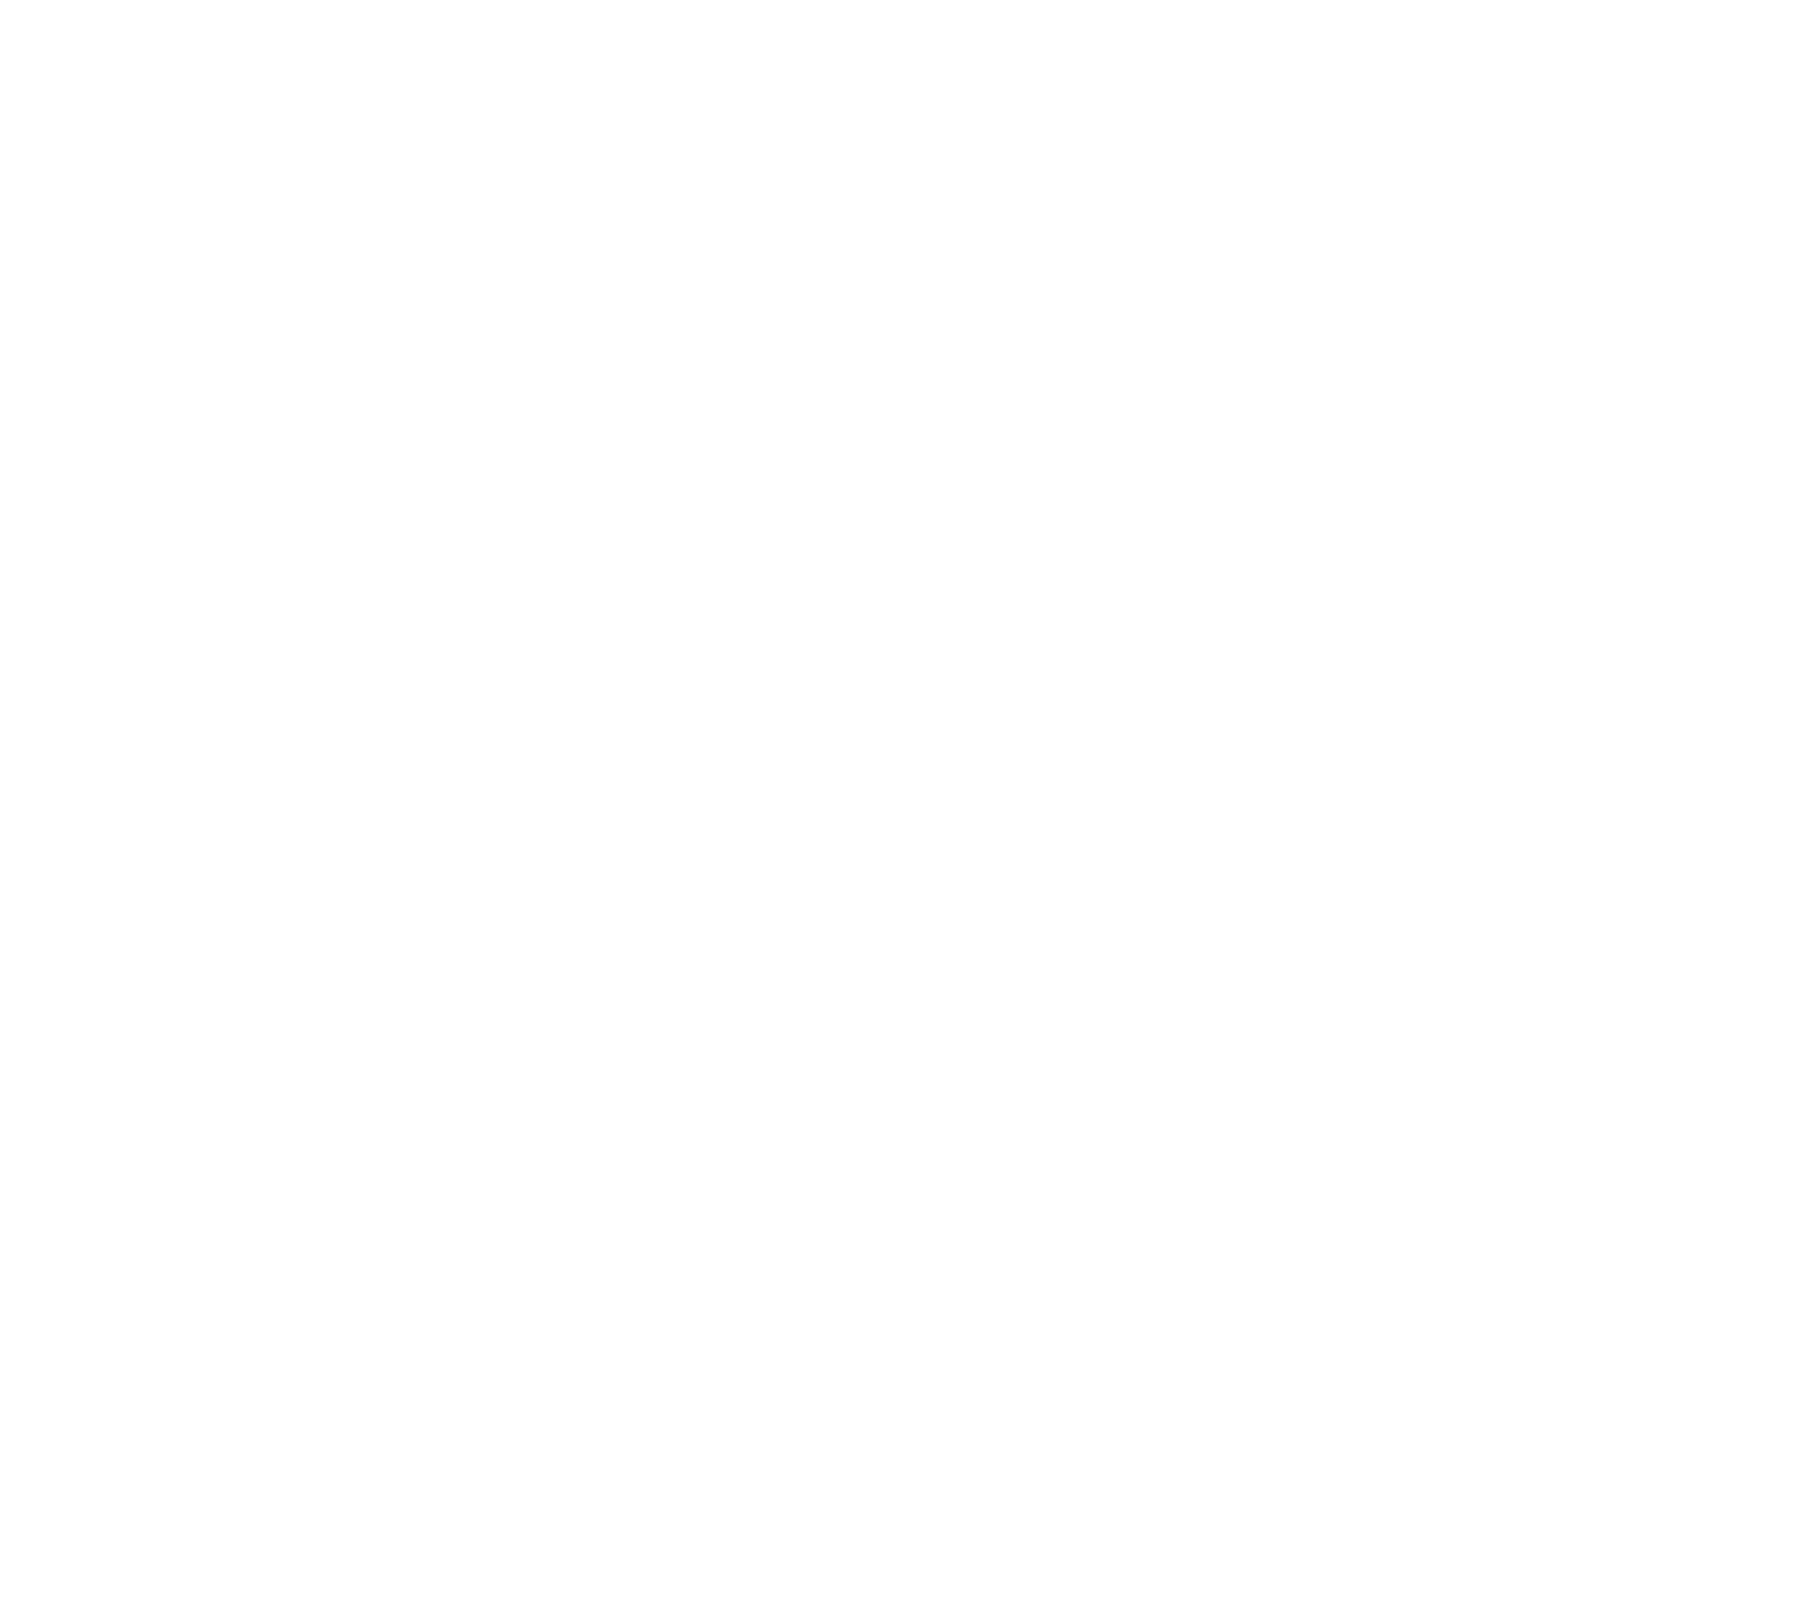

KeyError: 'OSQP_MPC_LTV'

In [10]:
"""
    This will generate the necessary CPU vs. Rewards Comparison Plots. 
"""
plotter.generate_cpu_comparison_plots(target_path = 'cpu_time_comparison')

## Classical Controller Guide:

All the classical controllers are located in this file: `cavs_environments/vehicle/k_road/controller/`

The structure of this folder is:

```
    controller/ 
            dynamic_model/ --> contains all the models so action transforms just query their results
                        car_lti_mpc.py  -->  needs work
                        car_ltv_mpc.py -->  finished
                        car_nl_mpc.py  --> needs work
                        dynamic_model.py --> finished
                        shivam_2018_model.py --> needs work
            functions/
                        functions.py --> finished
            optimizer/
                        lqr.py --> finished
                        qp.py --> finished
                        optimizer.py --> finished
           mpc_ltv_controller.py --> action transform for MPC LTV controller with OSQP solver
           pid_controllers.py --> action transform for longitudinal and lateral pid control
           pure_pursuit.py --> action transofrm for pure_pursuit
           stanley.py --> action transofrm for Stanley controller
           shivam_2018.py --> action transform for Shivam 2018, needs some work
            
```

### Figure 3:  performance vs number of observed waypoints

**Sarah August 14th:** This code isn't ready yet. It is code I found online and used when I went to plot live plots for movies and animations. 

In [ ]:
# Uncomment the next two lines if you want to save the animation
#import matplotlib
#matplotlib.use("Agg")
import numpy
from matplotlib.pylab import *
from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.animation as animation


# Zeroing States (shifting):
max_target= np.max(ym, axis = (0, 1))
min_target= np.min(ym, axis = (0, 1))
shift = (max_target + min_target) / 2.

# Sent for figure
font = {'size'   : 14}
matplotlib.rc('font', **font)

t_ = exp_time.flatten()
y_pred_ = yn[0, :, 1] - shift[1]
z_pred_ = yn[0, :, 2] - shift[2]
y_targ_ = ym[0, :, 1] - shift[1]
z_targ_ = ym[0, :, 2] - shift[2]
y_actual_ = actual[0, :, 1] - shift[1]
z_actual_ = actual[0, :, 2] - shift[2]
elapsed_ = elapsed[0, :, :].flatten()


f0 = figure(figsize = (12, 8))
f0.suptitle("Changes in Output vs. Time", fontsize=16)

ax1 = subplot2grid((2, 1), (0, 0))
ax2 = subplot2grid((2, 1), (1, 0))

ax1.set_xlabel('Time [s]', **font)
ax1.set_ylabel('y [mm]', **font)
ax2.set_xlabel('Time [s]', **font)
ax2.set_ylabel('z [mm]', **font)

# set y-limits
ax1.set_ylim(-20, 25)
ax2.set_ylim(-15, 25)

# sex x-limits
ax1.set_xlim(0,10.0)
ax2.set_xlim(0,10.0)

# Data Placeholders
y_pred=zeros(0)
y_targ=zeros(0)
y_actual=zeros(0)

z_pred=zeros(0)
z_targ=zeros(0)
z_actual=zeros(0)
t=zeros(0)

# set plots
p011, = ax1.plot(t,y_pred,color = color_palette[0], linewidth = 2., label=r"$\hat{y}$")
p012, = ax1.plot(t,y_actual, color = color_palette[1], linewidth = 2., label=r"$y_{true}$")
p013, = ax1.plot(t,y_targ, color = color_palette[-1], linestyle = 'dashed', linewidth = 2., label=r"$y_{true}$")

p021, = ax2.plot(t,z_pred,color = color_palette[0], linewidth = 2., label=r"$\hat{z}$")
p022, = ax2.plot(t,z_actual, color = color_palette[1], linewidth = 2., label=r"$z_{true}$")
p023, = ax2.plot(t,z_targ, color = color_palette[-1], linestyle = 'dashed', linewidth = 2., label=r"$z_{true}$")


# set lagends
ax1.legend([p011,p012,p013], [p011.get_label(),p012.get_label(),p013.get_label()], 
           prop = {"family": "Times New Roman", "size": 14}, loc= 'right', frameon= True)
ax2.legend([p021,p022,p023], [p021.get_label(),p022.get_label(),p023.get_label()], 
           prop = {"family": "Times New Roman", "size": 14}, loc= 'right', frameon= True)


# Data Update
tmin = 0.0
tmax = 10.0
x = 0.0
i = 0

def updateData(self):
    global i
    global y_pred
    global y_targ
    global y_actual

    global z_pred
    global z_targ
    global z_actual
    global x
    global t

    y_pred=append(y_pred,y_pred_[i])
    y_targ=append(y_targ,y_targ_[i])
    y_actual=append(y_actual,y_actual_[i])

    z_pred=append(z_pred,z_pred_[i])
    z_targ=append(z_targ,z_targ_[i])
    z_actual=append(z_actual,z_actual_[i])

    t=append(t,x)
    x += elapsed_[i]

    p011.set_data(t,y_pred)
    p012.set_data(t,y_actual)
    p013.set_data(t,y_targ)

    p021.set_data(t,z_pred)
    p022.set_data(t,z_actual)
    p023.set_data(t,z_targ)

    if (x>= tmax-1.00):
        p011.axes.set_xlim(x-tmax+1.0,x+1.0)
        p012.axes.set_xlim(x-tmax+1.0,x+1.0)
        p013.axes.set_xlim(x-tmax+1.0,x+1.0)

        p021.axes.set_xlim(x-tmax+1.0,x+1.0)
        p022.axes.set_xlim(x-tmax+1.0,x+1.0)
        p023.axes.set_xlim(x-tmax+1.0,x+1.0)
    i+=1
    return p011, p012, p013, p021, p022, p023

# interval: draw new frame every 'interval' ms
# frames: number of frames to draw
simulation = animation.FuncAnimation(f0, updateData, blit=False, frames=1000, 
                                     interval=20, repeat=False)

# Uncomment the next line if you want to save the animation
simulation.save(filename='sim.mp4',fps=30,dpi=300)

plt.show()